# [Google API 사용하기]
OCR: 광학 문자 인식(Optical Character Recognition)  
Detection: 이미지를 넣으면 각 물체의 위치를 추적

In [3]:
import io
import os

from google.cloud import vision
from google.cloud.vision import types

## 1. OCR

In [5]:
os.listdir('sample')

['(서울)김경남-「인공지능 업무자동화교육」 참가신청서.docx',
 '.ipynb_checkpoints',
 '2_1.xlsx',
 'bigstock-Group-Of-Animals-34563776.jpg',
 'My First Project-9501007579c9.json',
 'nums_keywords.xlsx',
 'Relevant keywords 20190212 2313.xlsx',
 'resume template.docx',
 'resume template.hwp',
 'resume template.pdf',
 't1.daumcdn.png',
 'tiger.jpg',
 'tutorial_1_5.xlsx',
 'tutorial_1_5_self.xlsx',
 'UNIVR 체계.hwp',
 'UNIVR 회칙.hwp',
 'UNIVR 회칙.pdf',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'wine_dataset.csv',
 '~$Relevant keywords 20190212 2313.xlsx',
 '「인공지능 업무자동화교육」 참가신청서.docx',
 '「인공지능 업무자동화교육」 참가신청서.hwp',
 '「인공지능 업무자동화교육」 참가신청서.pdf']

In [11]:
json_path='My First Project-9501007579c9.json'
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]=json_path

In [12]:
client=vision.ImageAnnotatorClient()

In [21]:
paper_path='sample/t1.daumcdn.png'

with io.open(paper_path, 'rb') as image_file:
    content=image_file.read()
    
image = vision.types.Image(content=content)
response = client.text_detection(image=image)
texts = response.text_annotations

In [27]:
texts[0].description

"<기획동향>\nKISO\nJOURNAL vol.33\n인공지능 기술의 현주소 및 향후 전망\n정규환 / ㈜부노 대표/기술이사\n(Keyword)\n인공지능, 증강지능, 헬스케어\nI. 인공지능 기술의 현주소\n에서 최다 연승 챔피언인 켄 제닝스(Ken\nJennings)와 최다 상금 획득자 브래드 러터\n(Brad Rutter)를 꺾으면서 다시 한번 인공지능\n에 대한 기대감이 높아졌으며, 인지컴퓨팅\n(Cognitive Computing)이라는 용어로 이 분야에\n서 선도적인 회사로 자리매김하게 된다. 마\n침내 2016년, 인간의 직관과 추론 능력이 가\n장 극적으로 발휘된다고 여겨지는 바둑에서\n구글의 자회사 딥마인드(DeepMind)의 인공지\n능 알고리즘·알파고(AlphaGo)'가 세계 최고\n의바둑 기사 중 한 명인 이세돌 9단을 세계\n인들이 지켜보는 가운데 압도적으로 물리치\n는 사건이 바로 대한민국의 수도 서울에서\n일어나면서 인공지능은 기술용어를 넘어 사\n회용어로 급부상하게 된다. 알파고가 상징하\n는 것은 인류가 수천 년 동안 발전시켜온 복\n잡한 문제의 해법을 고성능 하드웨어에 기반\n1) 인공지능의 역사\n인공지능의 역사에 대해 의견이 다양하지\n만, 기술로서의 인공지능은 1950년 앨런 튜\n링(Alan Turing)이 생각하는 기계의 개념과\n이를 평가하는 방법인 ·튜링 테스트(Turing\nTest)'를 제안하고, 1955년 존 맥카시(John\nMcCathy)에 의해 인공지능(Artificial\nIntelligence)'라는 용어가 탄생된 이후 본격적\n으로 시작되었다고 보는 것이 정설로 받아들\n여진다. 이후 과도한 기대와 투자가 이어진\n인공지능의 봄,과, 기술적 한계와 시장 실패\n로 인한 인공지능의 겨울이 반복되면서 인\n공지능은 화성 식민지 건설이나 암을 정복하\n겠다는 인류의 목표에 가까운 개념에서 실제\n달성 가능한 기술로서 패러다임을 발전시켜\n한연산량을 통해\n극복했다는 점이,아니라\n왔다, 1997년 IBM

In [26]:
for n in range(1,10):
    print(texts[n].description)

<
기획
동향
>
KISO
JOURNAL
vol.33
인공
지능


## 2. Detection: 영상처리

In [44]:
from PIL import Image

In [50]:
client=vision.ImageAnnotatorClient()
os.listdir('sample')

['(서울)김경남-「인공지능 업무자동화교육」 참가신청서.docx',
 '.ipynb_checkpoints',
 '2_1.xlsx',
 'bigstock-Group-Of-Animals-34563776.jpg',
 'nums_keywords.xlsx',
 'Relevant keywords 20190212 2313.xlsx',
 'resume template.docx',
 'resume template.hwp',
 'resume template.pdf',
 't1.daumcdn.png',
 'tiger.jpg',
 'tutorial_1_5.xlsx',
 'tutorial_1_5_self.xlsx',
 'UNIVR 체계.hwp',
 'UNIVR 회칙.hwp',
 'UNIVR 회칙.pdf',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'wine_dataset.csv',
 '~$Relevant keywords 20190212 2313.xlsx',
 '「인공지능 업무자동화교육」 참가신청서.docx',
 '「인공지능 업무자동화교육」 참가신청서.hwp',
 '「인공지능 업무자동화교육」 참가신청서.pdf']

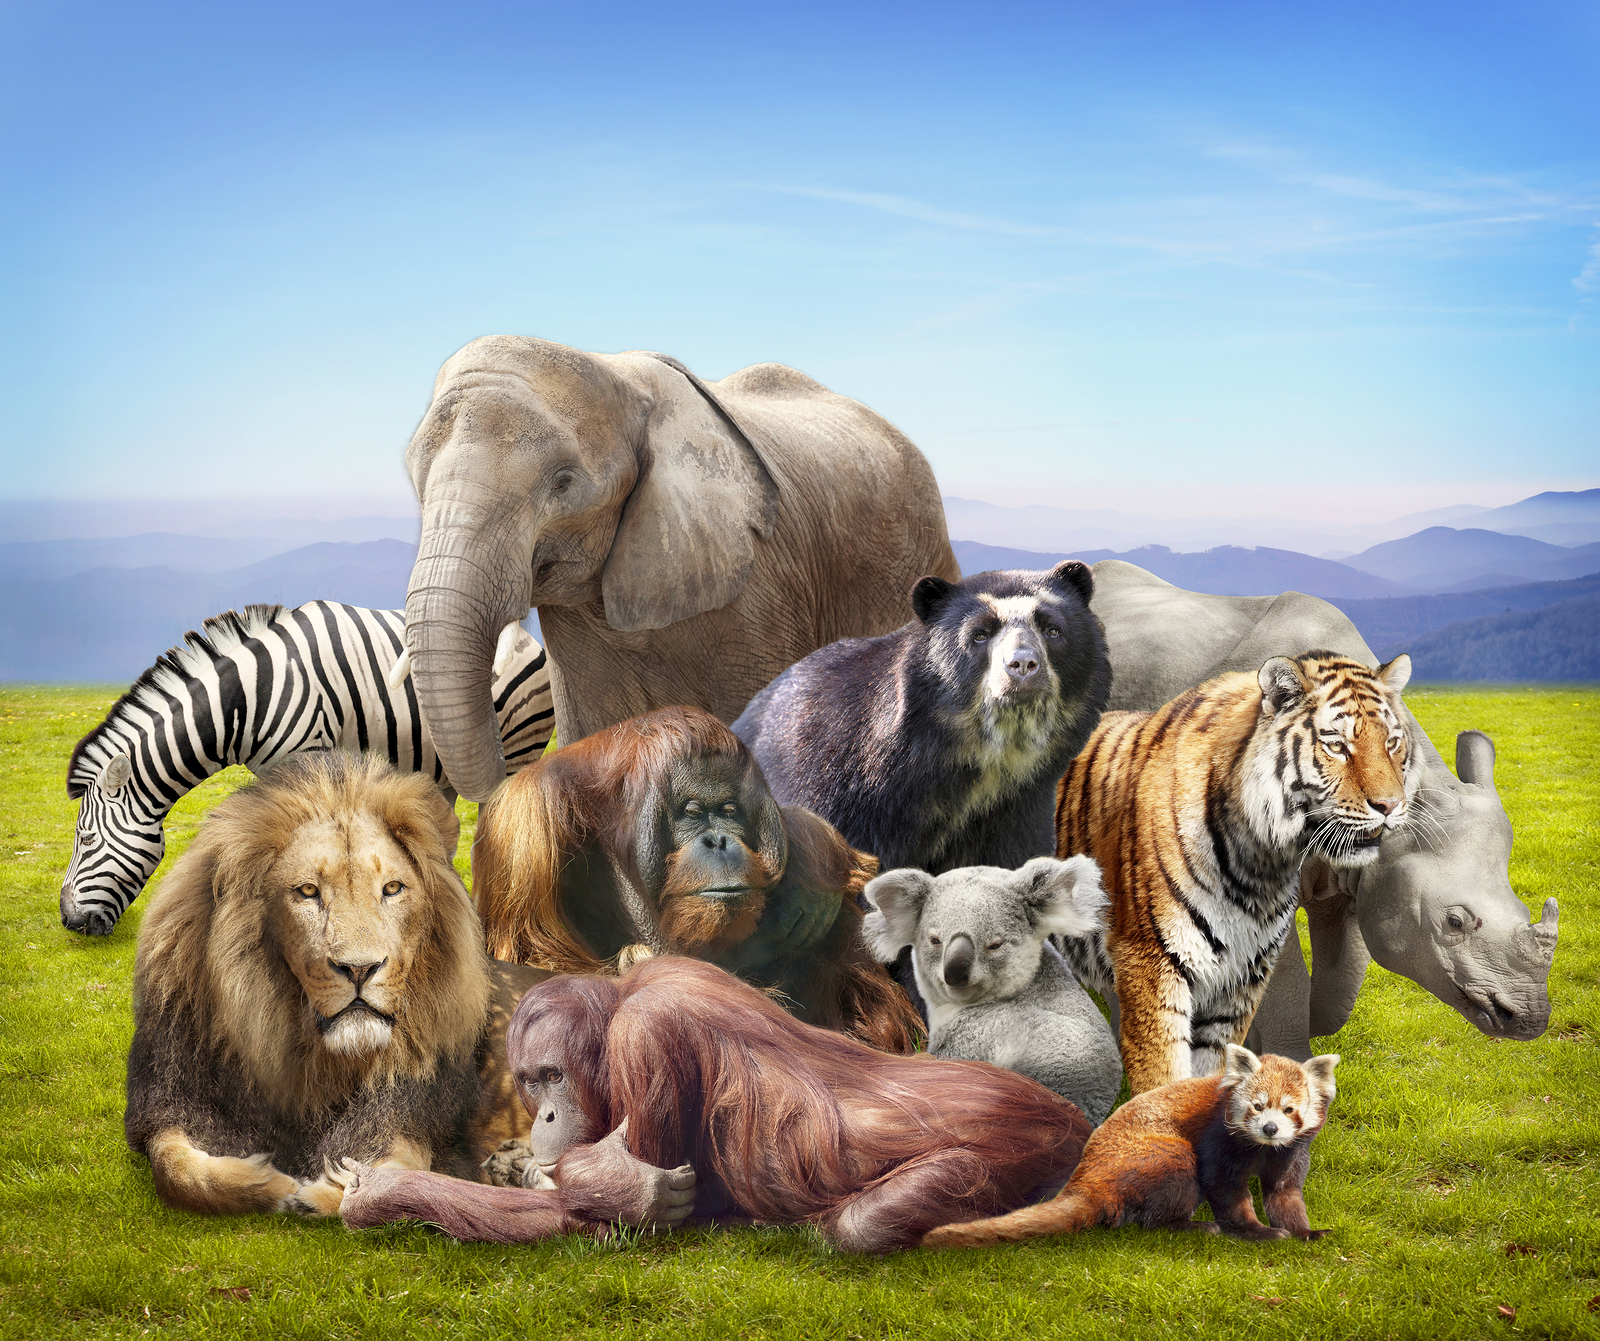

In [54]:
image_path='sample/bigstock-Group-Of-Animals-34563776.jpg'
Image.open(image_path)

In [57]:
with open(image_path, 'rb') as image_file:
    content = image_file.read()
image = vision.types.Image(content=content)

objects = client.object_localization(
    image=image).localized_object_annotations

print('Number of objects found: {}'.format(len(objects)))
for object_ in objects:
    print('\n{} (confidence: {})'.format(object_.name, object_.score))
    print('Normalized bounding polygon vertices: ')
    for vertex in object_.bounding_poly.normalized_vertices:
        print(' - ({}, {})'.format(vertex.x, vertex.y))

Number of objects found: 6

Animal (confidence: 0.7332704663276672)
Normalized bounding polygon vertices: 
 - (0.24000002443790436, 0.2442353069782257)
 - (0.5936470627784729, 0.2442353069782257)
 - (0.5936470627784729, 0.5710588693618774)
 - (0.24000002443790436, 0.5710588693618774)

Zebra (confidence: 0.7256933450698853)
Normalized bounding polygon vertices: 
 - (0.02047058939933777, 0.43835294246673584)
 - (0.28470590710639954, 0.43835294246673584)
 - (0.28470590710639954, 0.7030588984489441)
 - (0.02047058939933777, 0.7030588984489441)

Elephant (confidence: 0.710447371006012)
Normalized bounding polygon vertices: 
 - (0.24000002443790436, 0.2442353069782257)
 - (0.5936470627784729, 0.2442353069782257)
 - (0.5936470627784729, 0.5710588693618774)
 - (0.24000002443790436, 0.5710588693618774)

Animal (confidence: 0.672944962978363)
Normalized bounding polygon vertices: 
 - (0.07152940332889557, 0.5578823685646057)
 - (0.34658825397491455, 0.5578823685646057)
 - (0.34658825397491455, 0